## Coordinate Detection Model from Images 

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *

In [3]:
from fastai.vision.all import *

In [4]:
from pathlib import Path

In [5]:
path = Path()

In [6]:
path 

Path('.')

In [7]:
path.ls()

(#68) [Path('.git'),Path('.ipynb_checkpoints'),Path('SatelliteChallenge'),Path('bears'),Path('clean'),Path('dogs'),Path('images'),Path('models'),Path('tools'),Path('.gitignore')...]

In [8]:
path =path/'SatelliteChallenge/'
path.ls()

(#5) [Path('SatelliteChallenge/.ipynb_checkpoints'),Path('SatelliteChallenge/Images'),Path('SatelliteChallenge/Coordinates.csv'),Path('SatelliteChallenge/test1.jpg'),Path('SatelliteChallenge/test2.jpg')]

In [9]:
path.ls()


(#5) [Path('SatelliteChallenge/.ipynb_checkpoints'),Path('SatelliteChallenge/Images'),Path('SatelliteChallenge/Coordinates.csv'),Path('SatelliteChallenge/test1.jpg'),Path('SatelliteChallenge/test2.jpg')]

In [10]:
(path/'Images').ls().sorted()

(#20) [Path('SatelliteChallenge/Images/1.jpg'),Path('SatelliteChallenge/Images/10.jpg'),Path('SatelliteChallenge/Images/11.jpg'),Path('SatelliteChallenge/Images/12.jpg'),Path('SatelliteChallenge/Images/13.jpg'),Path('SatelliteChallenge/Images/14.jpg'),Path('SatelliteChallenge/Images/15.jpg'),Path('SatelliteChallenge/Images/16.jpg'),Path('SatelliteChallenge/Images/17.jpg'),Path('SatelliteChallenge/Images/18.jpg')...]

In [11]:
img_files = get_image_files(path)

In [12]:
img_files[0]

Path('SatelliteChallenge/test1.jpg')

In [13]:
im = PILImage.create(img_files[0])
im.shape

(988, 1648)

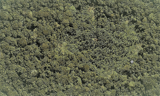

In [14]:
im.to_thumb(160)

In [15]:
# object point to all the images
pics = (path/'Images').ls().sorted()
pics[:10]

(#10) [Path('SatelliteChallenge/Images/1.jpg'),Path('SatelliteChallenge/Images/10.jpg'),Path('SatelliteChallenge/Images/11.jpg'),Path('SatelliteChallenge/Images/12.jpg'),Path('SatelliteChallenge/Images/13.jpg'),Path('SatelliteChallenge/Images/14.jpg'),Path('SatelliteChallenge/Images/15.jpg'),Path('SatelliteChallenge/Images/16.jpg'),Path('SatelliteChallenge/Images/17.jpg'),Path('SatelliteChallenge/Images/18.jpg')]

In [16]:
len(img_files)

22

In [17]:
df= pd.read_csv(path/'Coordinates.csv')

In [18]:
df.head()

ImageName     x    y
0     1.jpg    64  788
1    10.jpg  1142  548
2    11.jpg  1275  148
3    12.jpg   156  298
4    13.jpg  1614  548

In [19]:
df.shape

(20, 3)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ImageName  20 non-null     object
 1   x          20 non-null     int64 
 2   y          20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [21]:
dblock = DataBlock()

In [22]:
dsets = dblock.datasets(df)

In [23]:
len(dsets.train),len(dsets.valid)

(16, 4)

In [24]:
# actually returning a row for both the indepedent variable and dependent variable 
# what we need is actually pass image as an independent variable
# and get x,y coordinates as dependent variables
x,y = dsets.train[0]
x,y

(ImageName    10.jpg
 x              1142
 y               548
 Name: 1, dtype: object,
 ImageName    10.jpg
 x              1142
 y               548
 Name: 1, dtype: object)

In [25]:
x['ImageName']

'10.jpg'

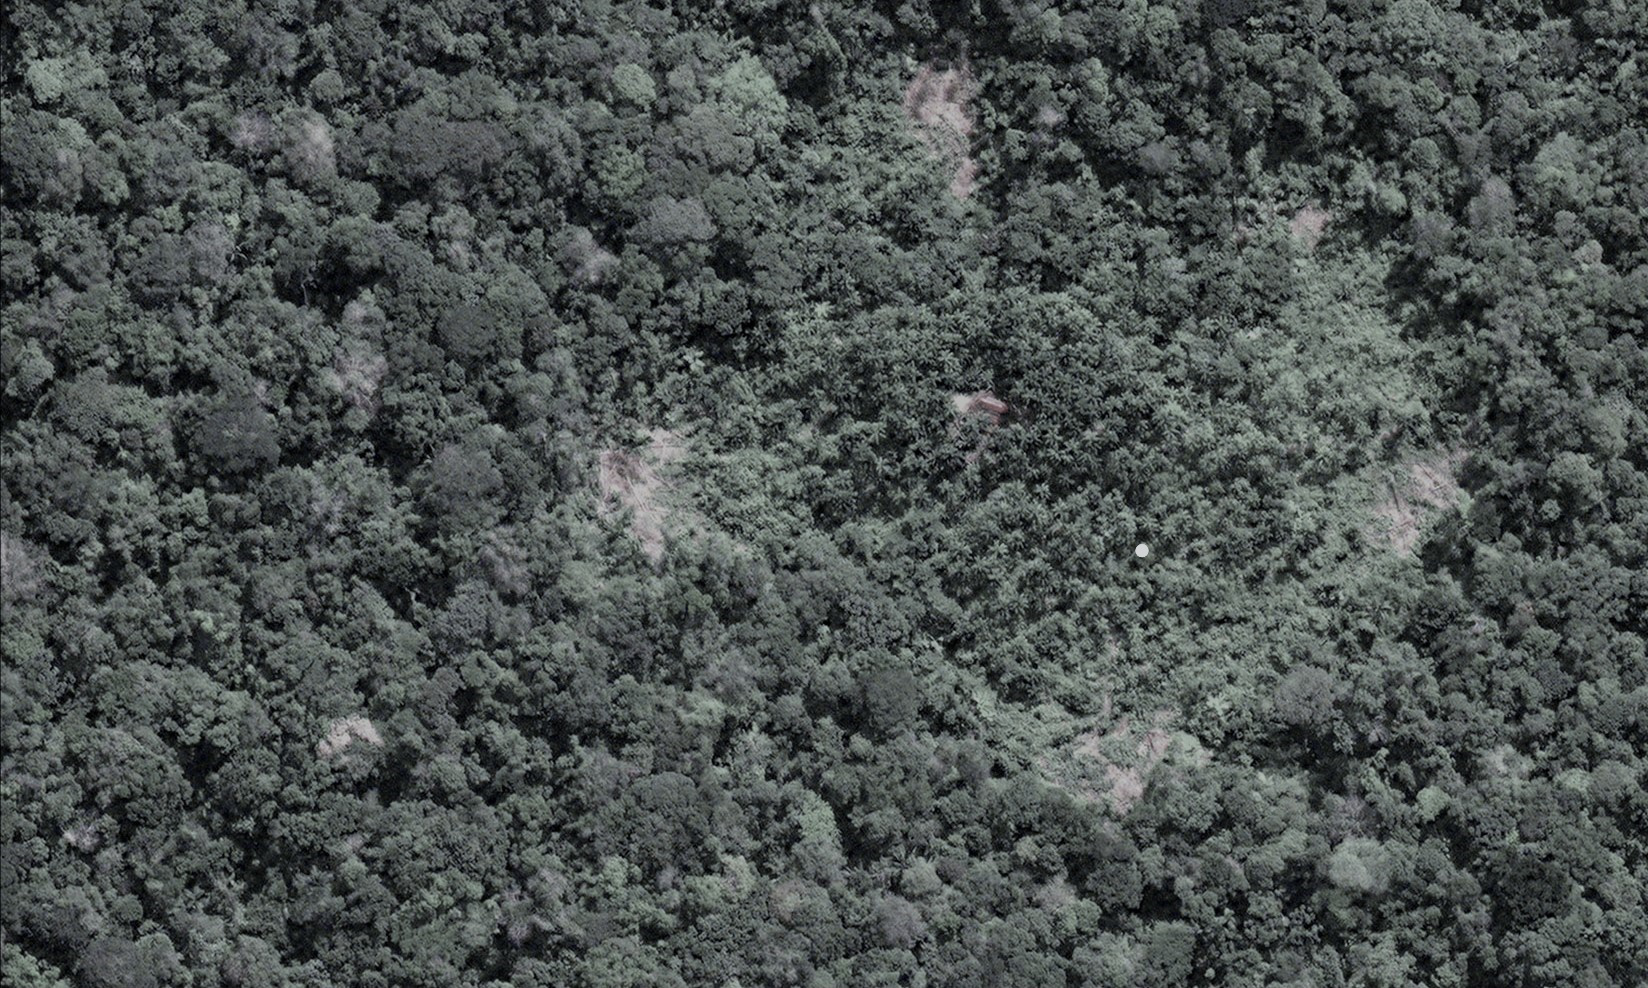

In [26]:
Image.open(path/'Images'/x['ImageName'])

In [27]:
path

Path('SatelliteChallenge')

In [28]:
x['x']

1142

In [29]:
## check for dependent variable
type(float(x['x']))

float

In [30]:
# Using Data block API --dataloader object
def get_x(r): return path/'Images'/r['ImageName']
def get_y(r): return tensor([r['x'],r['y']])
    
dblock = DataBlock(blocks=(ImageBlock, PointBlock), get_x = get_x, get_y = get_y,   
                   item_tfms = Resize(128))
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=1980x1113, TensorPoint([[1086.,  999.]]))

In [31]:
dsets.train[1]

(PILImage mode=RGB size=1980x1113, TensorPoint([[282., 798.]]))

In [32]:
dblock = DataBlock(blocks=(ImageBlock, PointBlock), 
                   get_x = get_x, 
                   get_y = get_y, 
                   item_tfms=Resize(160))
# data loader object
dls = dblock.dataloaders(df,bs=5)

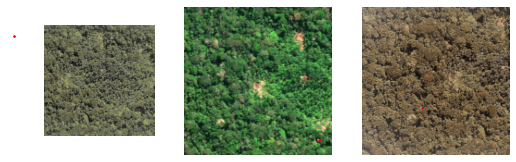

In [33]:
dls.show_batch(nrows =1 , ncols =3)

In [34]:
dblock.summary(df)

Setting-up type transforms pipelines
0      1.jpg    64   788
1     10.jpg  1142   548
2     11.jpg  1275   148
3     12.jpg   156   298
4     13.jpg  1614   548
5     14.jpg   417   673
6     15.jpg   254   365
7     16.jpg   818   950
8     17.jpg  1356   636
9     18.jpg   306   672
10    19.jpg   178    95
11     2.jpg  1086   999
12    20.jpg  1609    30
13     3.jpg   869   532
14     4.jpg  1809   505
15     5.jpg   400   704
16     6.jpg  1707   302
17     7.jpg   195   466
18     8.jpg  1428  1081
19     9.jpg   282   798
Found 20 items
2 datasets of sizes 16,4
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipeline: get_y -> TensorPoint.create

Building one sample
  Pipeline: get_x -> PILBase.create
    starting from
      ImageName    20.jpg
x              1609
y                30
Name: 12, dtype: object
    applying get_x gives
      SatelliteChallenge/Images/20.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=1648x988
  Pipeline: get_y -> TensorP

In [35]:
# batch size
xdim,ydim = dls.one_batch()
xdim.shape,ydim.shape

(torch.Size([5, 3, 160, 160]), torch.Size([5, 1, 2]))

In [36]:
# creating learner

learn = cnn_learner(dls, resnet34, y_range=(-1,1))

In [37]:
# loss function
dls.loss_func

FlattenedLoss of MSELoss()

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=5.754399353463668e-06)

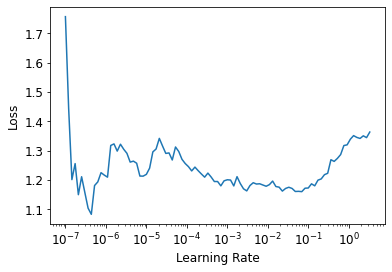

In [38]:
# finding learning rate
learn.lr_find()

In [39]:
lr = 1e-6
learn.fine_tune(3, lr)

In [40]:
# average coordinate prediction error
math.sqrt(0.849397)

0.9216273650451141

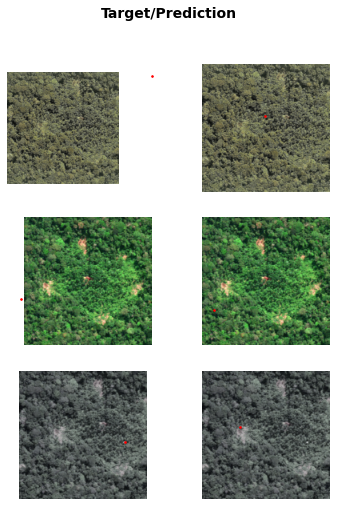

In [41]:
learn.show_results(ds_idx=1, nrows=3, figsize=(6,8))

In [42]:
learn.export()

In [43]:
path = Path()
path

Path('.')

In [44]:
path.ls(file_exts = '.pkl')

(#3) [Path('Dog_Classifier.pkl'),Path('Fire-detector.pkl'),Path('export.pkl')]

In [45]:
learn_inf = load_learner(path/'export.pkl')

In [46]:
learn_inf.predict('SatelliteChallenge/test1.jpg')

(TensorPoint([[78.1433, 64.1960]]),
 tensor([-0.0232, -0.1975]),
 tensor([-0.0232, -0.1975]))

In [47]:
learn_inf.predict('SatelliteChallenge/test2.jpg')

(TensorPoint([[ 14.9875, 115.3023]]),
 tensor([-0.8127,  0.4413]),
 tensor([-0.8127,  0.4413]))

In [48]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [50]:
img = PILImage.create(btn_upload.data[-1])

In [51]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [52]:
coordinates,avg_error1,avg_error2 = learn_inf.predict(img)

In [53]:
lbl_pred = widgets.Label()
lbl_pred.value = f' COORDINATES (x,y): {coordinates}'
lbl_pred

Label(value=' COORDINATES (x,y): TensorPoint([[152.5798,  67.5533]])')

In [54]:
btn_run = widgets.Button(description='Location')
btn_run
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    coordinates,avg_error1,avg_error2 = learn_inf.predict(img)
    lbl_pred.value = f'Predicted Location Coordinates: {coordinates}'

btn_run.on_click(on_click_classify)

In [55]:
btn_upload = widgets.FileUpload()


In [56]:
from fastai.vision.widgets import *
VBox([widgets.Label('**Precise Location Smoke Detection System**'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [57]:
# need to enable in the anaconda first --  jupyter serverextension enable --sys-prefix voila
!pip install voila
!jupyter serverextension enable voila --sys-prefix

Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.1.23 OK


## Link to the Web GUI
https://njutpu14.gradient.paperspace.com/voila/render/fastbook/Smoke%20Location%20Detector-%20Precise%20Coordinates.ipynb